## Plotting statistics about the upper bound of the test statistic

Uncomment to save plots

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.rc('font',size=14)

In [2]:
def sub_the_table(tab,n,N,L):
    subtab = tab[(tab['n']==n)&(tab['N']==N)&(tab['L']==L)]
    return subtab

In [55]:

ns = [5000,10000]
# Ns = [10000,25000,50000,100000,1000000,10000000]
Ns = [10000,25000,50000,1000000]
Ls = [1.0,2.0,3.0,4.0]

datadic2 = dict()
datadic2['n'] = []
datadic2['N'] = []
datadic2['L'] = []
datadic2['0.005'] = []
datadic2['0.025'] = []
datadic2['0.05'] = []
datadic2['0.1'] = []
datadic2['0.9'] = []
datadic2['0.95'] = []
datadic2['0.975'] = []
datadic2['0.995'] = []
datadic2['0.9986501'] = []
datadic2['0.9999683'] = []

for n in ns:
    for N in Ns:
        for L in Ls:
            try:
                sim=1000
                rep=2000
                filein2 = '../data/shapiro/percentile-n' + str(n) + '-N' + str(N) + '-L' + str(L) + '-sim' + str(sim) + '-rep' + str(rep) + '.tsv'
                h = open(filein2,'r')
                h.readline()
                for i in range(10):
                    line = h.readline().strip()
                    perc, value = line.split('\t')
                    datadic2[perc].append(float(value))
                h.close()
            except:
                sim=500
                rep=1000
                filein2 = '../data/shapiro/percentile-n' + str(n) + '-N' + str(N) +  '-L' + str(L) + '-sim' + str(sim) + '-rep' + str(rep) + '.tsv'
                h = open(filein2,'r')
                h.readline()
                for i in range(10):
                    line = h.readline().strip()
                    perc, value = line.split('\t')
                    datadic2[perc].append(float(value))
                h.close()
                
            datadic2['n'].append(n)
            datadic2['N'].append(N)
            datadic2['L'].append(L)
            
df2 = pd.DataFrame(datadic2)
df2.head()

,n,N,L,0.005,0.025,0.05,0.1,0.9,0.95,0.975,0.995,0.9986501,0.9999683
0,5000,10000,1.0,212844.990,220725.975,225050.0,230352.0,276871.1,285315.05,293193.025,310760.040,324998.308099,371424.710081
1,5000,10000,2.0,111834.995,115055.975,116819.0,118877.0,136137.0,139151.00,141876.000,147565.005,151821.359449,163698.657957
2,5000,10000,3.0,76077.000,77955.000,78969.0,80170.0,89879.0,91491.00,92923.000,95940.005,98228.051350,103801.151300
3,5000,10000,4.0,57593.995,58866.000,59552.0,60349.0,66816.0,67878.00,68819.000,70815.005,72244.154050,76048.601395
4,5000,25000,1.0,89391.000,91724.000,93003.0,94499.9,106815.0,108895.00,110782.000,114775.010,117852.102700,126805.966262


In [146]:
idx = -2
sdname = '3 std. dev.'
zetas = [0.005,0.025,0.05,0.1,0.9,0.95,0.975,0.995,0.9986501,0.9999683]
print(zetas[idx])

zeta = zetas[idx]
zquantile = norm.ppf(zeta)
ns = [5000,10000]
# Ns = [10000,25000,50000,100000,1000000,10000000]
Ns = [10000,25000,50000,1000000]
Ls = [1.0,2.0,3.0,4.0]

datadic4 = dict()
datadic4['n'] = []
datadic4['N'] = []
datadic4['L'] = []
datadic4['true_upper_bound'] = []
datadic4['average_upper_bound'] = []
datadic4['average_relative_upper_bound'] = []
datadic4['average_mean'] = []
datadic4['average_stddev'] = []

for n in ns:
    for N in Ns:
        for L in Ls:
            try:
                m = 2 * n
                M = m * (m - 1) / 2
                filein = '../data/shapiro/shapiro-n' + str(n) + '-N' + str(N) + '-cM' + str(L) + '.tsv'
                    
                table = pd.read_csv(filein, sep='\t')
                table['rightestimate'] = table['mean'] + norm.ppf(zeta) * table['stddev']
                
                subtable = sub_the_table(df2,n,N,L)

                right = list(subtable[str(zeta)])[0]
                relative_heights = table['rightestimate'] / right
                relative_height = relative_heights.mean()
                height = table['rightestimate'].mean()

                datadic4['n'].append(n)
                datadic4['N'].append(N)
                datadic4['L'].append(L)
                datadic4['true_upper_bound'].append(right)
                datadic4['average_upper_bound'].append(height)
                datadic4['average_relative_upper_bound'].append(relative_height)
                datadic4['average_mean'].append(table['mean'].mean())
                datadic4['average_stddev'].append(table['stddev'].mean())
            except:
                pass
df4 = pd.DataFrame(datadic4)
df4['mL'] = df4['L'] / 100
df4.head()

0.9986501


,n,N,L,true_upper_bound,average_upper_bound,average_relative_upper_bound,average_mean,average_stddev,mL
0,5000,10000,1.0,324998.308099,308166.651807,0.948210,252727.300856,18479.786386,0.01
1,5000,10000,2.0,151821.359449,147631.849121,0.972405,127238.449084,6797.801019,0.02
2,5000,10000,3.0,98228.051350,96313.908264,0.980513,84901.825408,3804.028182,0.03
3,5000,10000,4.0,72244.154050,71120.701216,0.984449,63509.176304,2537.175346,0.04
4,5000,25000,1.0,117852.102700,115063.997164,0.976342,100489.590064,4858.136419,0.01


In [153]:
n=5000
N=50000
L=2.0
subdf = df4[(df4['n']==n)&(df4['N']==N)&(df4['L']==L)]
subdf

,n,N,L,true_upper_bound,average_upper_bound,average_relative_upper_bound,average_mean,average_stddev,mL
9,5000,50000,2.0,27123.0,26944.821775,0.993431,24809.588928,711.744388,0.02


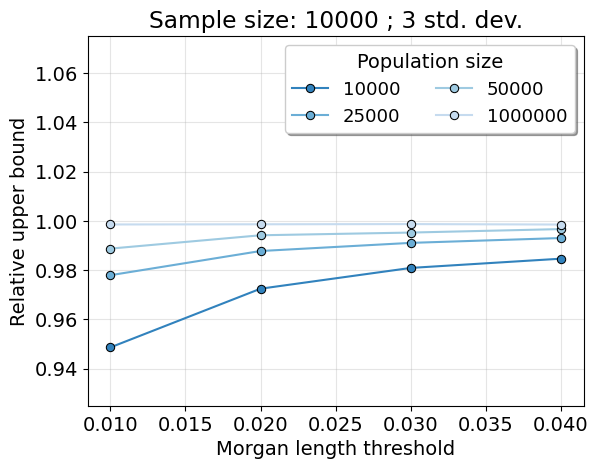

In [101]:

figname = 'relative-upp-n10000-3sd'

sns.lineplot(df4[df4['n']==10000],
             x='mL',
             y='average_relative_upper_bound',
             hue='N',
             palette='tab20c',
             marker='o',
             markeredgecolor='k',
            )

plt.legend(title='Population size',
           fontsize=13,
           frameon=True,
           shadow=True,
           ncol=2,
           loc='upper right',
          )
plt.ylim(0.925,1.075)
# plt.ylim(0.875,1.125)
plt.xlabel('Morgan length threshold')
plt.ylabel('Relative upper bound')
plt.grid(alpha=0.33)
plt.title('Sample size: 10000 ; ' + str(sdname))
# plt.axhline(1.,color='k',linewidth=2,linestyle='dotted')

# plt.savefig(figname + '.png')
# plt.savefig(figname + '.tiff')

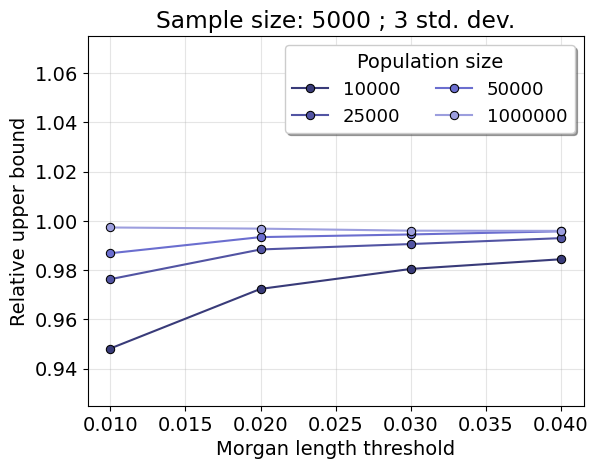

In [102]:
figname = 'relative-upp-n5000-3sd'

sns.lineplot(df4[df4['n']==5000],
             x='mL',
             y='average_relative_upper_bound',
             hue='N',
             palette='tab20b',
             marker='o',
             markeredgecolor='k',
            )

plt.legend(title='Population size',
           fontsize=13,
           frameon=True,
           shadow=True,
           ncol=2,
           loc='upper right',
          )
plt.ylim(0.925,1.075)
# plt.ylim(0.875,1.125)
# plt.xlim(0.005,0.045)
plt.xlabel('Morgan length threshold')
plt.ylabel('Relative upper bound')
plt.grid(alpha=0.33)
plt.title('Sample size: 5000 ; ' + sdname)
# plt.axhline(1.,color='k',linewidth=2,linestyle='dotted')

# plt.savefig(figname + '.png')
# plt.savefig(figname + '.tiff')

#### Looking at false positives

In [194]:
another_table = pd.read_csv('../manual-fp.csv',sep=',')
another_table = another_table.iloc[:8]
another_table['N'] = [1000000,50000,25000,10000]+[1000000,50000,25000,10000]
another_table['n'] = [10000 for i in range(4)] + [5000 for i in range(4)]
another_table['sd'] = [4,4,4,4,3,3,3,3]
# another_table['N'] = another_table['N'].astype(float)
another_table.head()

,n,N,L,pvalue,qvalue,qpercent,ppast,qpast,m,sd
0,10000,1000000,2.0,1.0000,"5,379",0.9999,87,50,"1,572,480",4
1,10000,50000,2.0,1.0000,"110,587",0.9999,16,71,"500,000",4
2,10000,25000,2.0,1.0000,"230,898",0.9997,16,158,"500,000",4
3,10000,10000,2.0,1.0000,"627,417",0.9994,16,311,"500,000",4
4,5000,1000000,2.0,0.9987,"1,374",0.9982,"2,743","3,681","2,000,000",3


In [195]:
another_table['q_out_of_3000'] = (1-another_table['qpercent']) * 3000
another_table['p_out_of_3000'] = (1-another_table['pvalue']) * 3000
another_table['N']
another_table['Nk'] = another_table['N']/1000
another_table['logN'] = np.log10(another_table['N'])
another_table

,n,N,L,pvalue,qvalue,qpercent,ppast,qpast,m,sd,q_out_of_3000,p_out_of_3000,Nk,logN
0,10000,1000000,2.0,1.0000,"5,379",0.9999,87,50,"1,572,480",4,0.3,0.0,1000.0,6.00000
1,10000,50000,2.0,1.0000,"110,587",0.9999,16,71,"500,000",4,0.3,0.0,50.0,4.69897
2,10000,25000,2.0,1.0000,"230,898",0.9997,16,158,"500,000",4,0.9,0.0,25.0,4.39794
3,10000,10000,2.0,1.0000,"627,417",0.9994,16,311,"500,000",4,1.8,0.0,10.0,4.00000
4,5000,1000000,2.0,0.9987,"1,374",0.9982,"2,743","3,681","2,000,000",3,5.4,3.9,1000.0,6.00000
5,5000,50000,2.0,0.9987,"26,945",0.9974,675,"1,325","500,000",3,7.8,3.9,50.0,4.69897
6,5000,25000,2.0,0.9987,"55,582",0.9967,675,"1,666","500,000",3,9.9,3.9,25.0,4.39794
7,5000,10000,2.0,0.9987,"147,632",0.9951,675,"2,453","500,000",3,14.7,3.9,10.0,4.00000


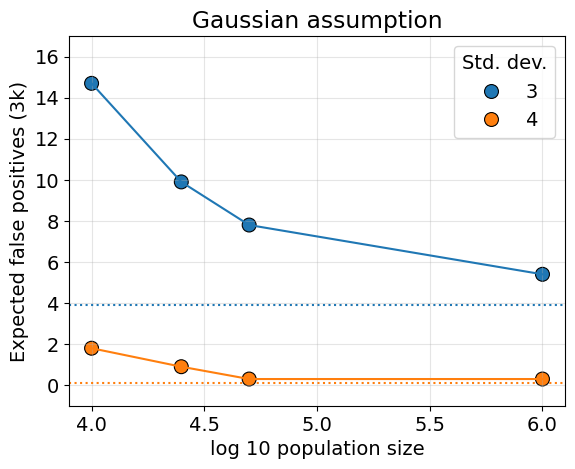

In [219]:
sns.scatterplot(another_table,
             x='logN',
             y='q_out_of_3000',
             hue='sd',
                palette='tab10',
                edgecolor='k',
                s=100,
            )

sns.lineplot(another_table,
             x='logN',
             y='q_out_of_3000',
             hue='sd',
             palette='tab10',
                legend=False,
            )

plt.grid(alpha=0.33)
plt.ylim(-1,17)

plt.ylabel('Expected false positives (3k)')
plt.xlabel('log 10 population size')

plt.legend(title='Std. dev.')

plt.title('Gaussian assumption')

plt.axhline(3.9,color='tab:blue',linestyle='dotted')
plt.axhline(0.1,color='tab:orange',linestyle='dotted')

# plt.savefig('gaussian-fps.png')
# plt.savefig('gaussian-fps.tiff')

### Complex demography

In [14]:

ns = [5000,10000]
Ns = ['three-phase-2000G.ne','bottleneck-1000G.ne']
Ls = [1,2,3,4]

datad = dict()
datad['n'] = []
datad['N'] = []
datad['L'] = []
datad['0.005'] = []
datad['0.025'] = []
datad['0.05'] = []
datad['0.1'] = []
datad['0.9'] = []
datad['0.95'] = []
datad['0.975'] = []
datad['0.995'] = []
datad['0.9986501'] = []
datad['0.9999683'] = []

for n in ns:
    for N in Ns:
        for L in Ls:
            try:
                filein2 = '../data/shapiro/percentile-'+ str(N) + '-n' + str(n) + '-L' + str(L)+ '.txt'
                h = open(filein2,'r')
                h.readline()
                for i in range(10):
                    line = h.readline().strip()
                    perc, value = line.split('\t')
                    datad[perc].append(float(value))
                h.close()
            except:
                pass
                
            datad['n'].append(n)
            datad['N'].append(N)
            datad['L'].append(L)
            
dfd = pd.DataFrame(datad)
dfd['mL'] = dfd['L'] / 100
Nname = dfd['N'].to_list()
nick = ['BN' if Nn == 'bottleneck-1000G.ne' else 'G3' for Nn in Nname]
dfd['nickname'] = nick
dfd['legend'] = dfd['nickname'] + '-' + dfd['n'].astype(str)
dfd.sort_values('legend',inplace=True)
dfd.head()

,n,N,L,0.005,0.025,0.05,0.1,0.9,0.95,0.975,0.995,0.9986501,0.9999683,mL,nickname,legend
12,10000,bottleneck-1000G.ne,1,35638.0,36650.0,37191.0,37833.0,43237.0,44167.0,45010.0,46797.00,48112.12511,52301.209998,0.01,BN,BN-10000
13,10000,bottleneck-1000G.ne,2,4298.0,4359.0,4389.0,4426.0,4692.0,4732.0,4766.0,4834.00,4880.00000,5000.000000,0.02,BN,BN-10000
14,10000,bottleneck-1000G.ne,3,2211.0,2245.0,2262.0,2282.0,2429.0,2450.0,2468.0,2504.46,2530.00000,2593.646356,0.03,BN,BN-10000
15,10000,bottleneck-1000G.ne,4,1575.0,1603.0,1616.0,1633.0,1750.0,1768.0,1782.0,1812.00,1832.00000,1879.641760,0.04,BN,BN-10000
4,5000,bottleneck-1000G.ne,1,8753.0,9037.0,9187.0,9369.0,10868.0,11123.0,11358.0,11864.00,12249.00000,13391.939902,0.01,BN,BN-5000


In [27]:
idx = -1
sdname = '4 std. dev.'
titlesdname = '4 standard deviations'
zetas = [0.005,0.025,0.05,0.1,0.9,0.95,0.975,0.995,0.9986501,0.9999683]
print(zetas[idx])

zeta = zetas[idx]
zquantile = norm.ppf(zeta)


ns = [5000,10000]
Ns = ['three-phase-2000G.ne','bottleneck-1000G.ne']
Ls = [1,2,3,4]

datad4 = dict()
datad4['n'] = []
datad4['N'] = []
datad4['L'] = []
datad4['true_upper_bound'] = []
datad4['average_upper_bound'] = []
datad4['average_relative_upper_bound'] = []
datad4['average_mean'] = []
datad4['average_stddev'] = []

for n in ns:
    for N in Ns:
        for L in Ls:
            try:
                m = 2 * n
                M = m * (m - 1) / 2
                filein = '../data/shapiro/shap-edges-together-N-' + str(N) + '-n' + str(n) + '-L' + str(L) + '.tsv'
                    
                table = pd.read_csv(filein, sep='\t')
                table['rightestimate'] = table['mean'] + norm.ppf(zeta) * table['stddev']
                
                subtable = sub_the_table(dfd,n,N,L)

                right = list(subtable[str(zeta)])[0]
                relative_heights = table['rightestimate'] / right
                relative_height = relative_heights.mean()
                height = table['rightestimate'].mean()

                datad4['n'].append(n)
                datad4['N'].append(N)
                datad4['L'].append(L)
                datad4['true_upper_bound'].append(right)
                datad4['average_upper_bound'].append(height)
                datad4['average_relative_upper_bound'].append(relative_height)
                datad4['average_mean'].append(table['mean'].mean())
                datad4['average_stddev'].append(table['stddev'].mean())
            except:
                pass
dfd4 = pd.DataFrame(datad4)
dfd4['mL'] = dfd4['L'] / 100
Nname = dfd4['N'].to_list()
nick = ['BN' if Nn == 'bottleneck-1000G.ne' else 'G3' for Nn in Nname]
dfd4['nickname'] = nick
dfd4['legend'] = dfd4['nickname'] + '-' + dfd4['n'].astype(str)
dfd4.sort_values('legend',inplace=True)
dfd4.head()

0.9999683


,n,N,L,true_upper_bound,average_upper_bound,average_relative_upper_bound,average_mean,average_stddev,mL,nickname,legend
12,10000,bottleneck-1000G.ne,1,52301.209998,48981.451516,0.936526,40455.595336,2131.578507,0.01,BN,BN-10000
13,10000,bottleneck-1000G.ne,2,5000.000000,4973.846023,0.994769,4557.997947,103.967602,0.02,BN,BN-10000
14,10000,bottleneck-1000G.ne,3,2593.646356,2583.352271,0.996031,2355.226911,57.034403,0.03,BN,BN-10000
15,10000,bottleneck-1000G.ne,4,1879.641760,1874.979011,0.997519,1691.465106,45.880940,0.04,BN,BN-10000
4,5000,bottleneck-1000G.ne,1,13391.939902,12464.317306,0.930733,10095.939248,592.126311,0.01,BN,BN-5000


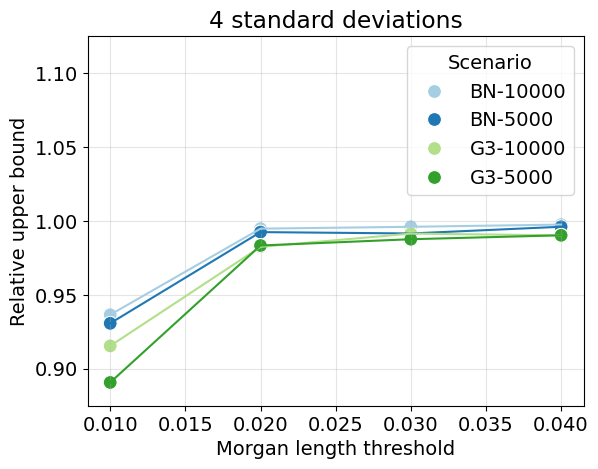

In [30]:
sns.lineplot(dfd4,
                x='mL',
                y='average_relative_upper_bound',
                hue='legend',
             palette='Paired',
             legend=False
               )

# plt.legend().remove()

sns.scatterplot(dfd4,
                x='mL',
                y='average_relative_upper_bound',
                hue='legend',
                palette='Paired',
                s=100
               )

# plt.axhline(0.01,color='k',linestyle='dotted')
plt.grid(alpha=0.33)
# plt.ylim(0,1)

plt.legend(title='Scenario')

plt.ylim(0.875,1.125)
plt.xlabel('Morgan length threshold')
plt.ylabel('Relative upper bound')
plt.grid(alpha=0.33)
plt.title(titlesdname)
# plt.axhline(1.,color='k',linewidth=2,linestyle='dotted')

# plt.savefig('upper-bound-complex-demography-stddev4.png')
# plt.savefig('upper-bound-complex-demography-stddev4.tiff')